# SVM Assignment -Salary Dataset

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sal1=pd.read_csv(r"C:\Users\delll\Desktop\Python\DataSets\SalaryData_Train.xls")
sal2=pd.read_csv(r"C:\Users\delll\Desktop\Python\DataSets\SalaryData_Test.xls")

In [3]:
sal1.shape
#there are 30161 rows and 14 columns

(30161, 14)

In [4]:
sal2.shape
#rows=15060 and columns=14

(15060, 14)

In [5]:
sal1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
sal1.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [7]:
sal1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
sal1.isnull().sum()
#there are no null values in the dataset

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
sal2.isnull().sum()
#there are no null values in the dataset

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
sal1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
sal2.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


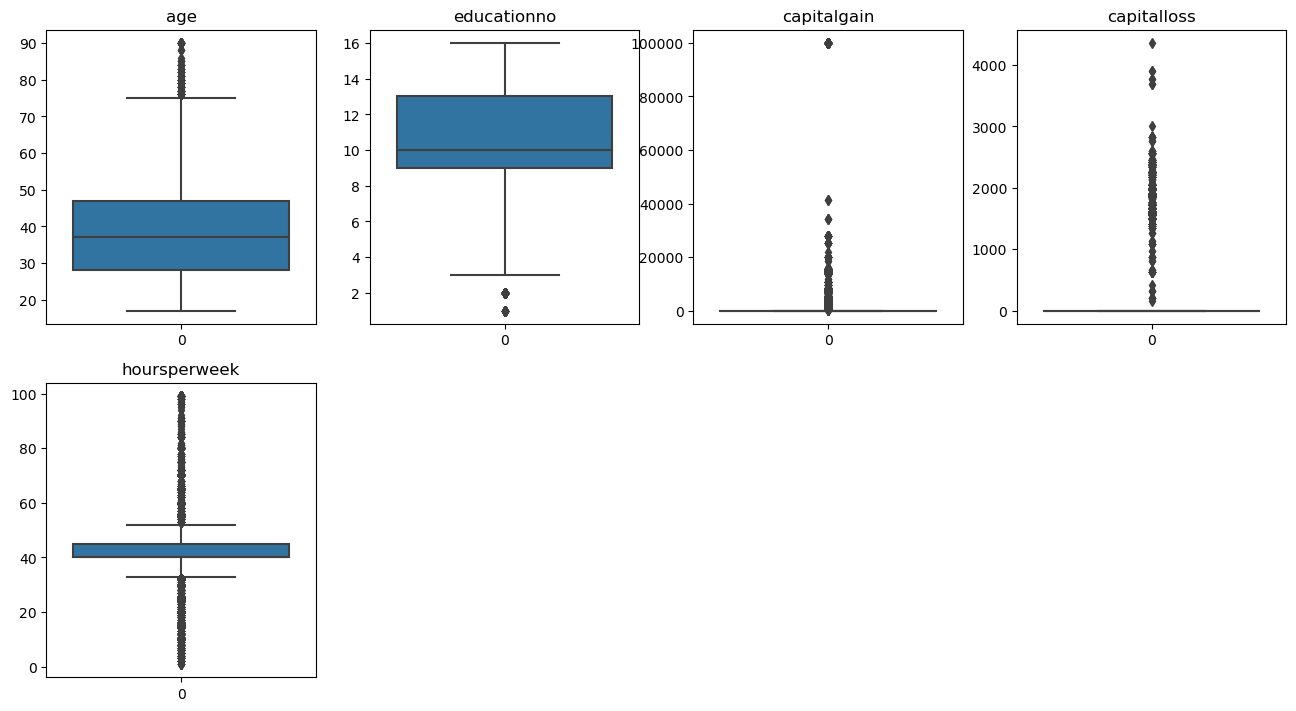

In [13]:
i=1
plt.figure(figsize=(16,13))
for col in sal1.describe().columns:
    plt.subplot(3,4,i)
    sns.boxplot(sal1[col])
    plt.title(col)
    i=i+1

In [17]:
list(sal1.describe().columns)

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [19]:
from feature_engine.outliers import Winsorizer
cols=['age', 'educationno', 'hoursperweek']
for col in cols:
    winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=col,tail="both")
    sal1[col]=winsor.fit_transform(sal1[[col]])

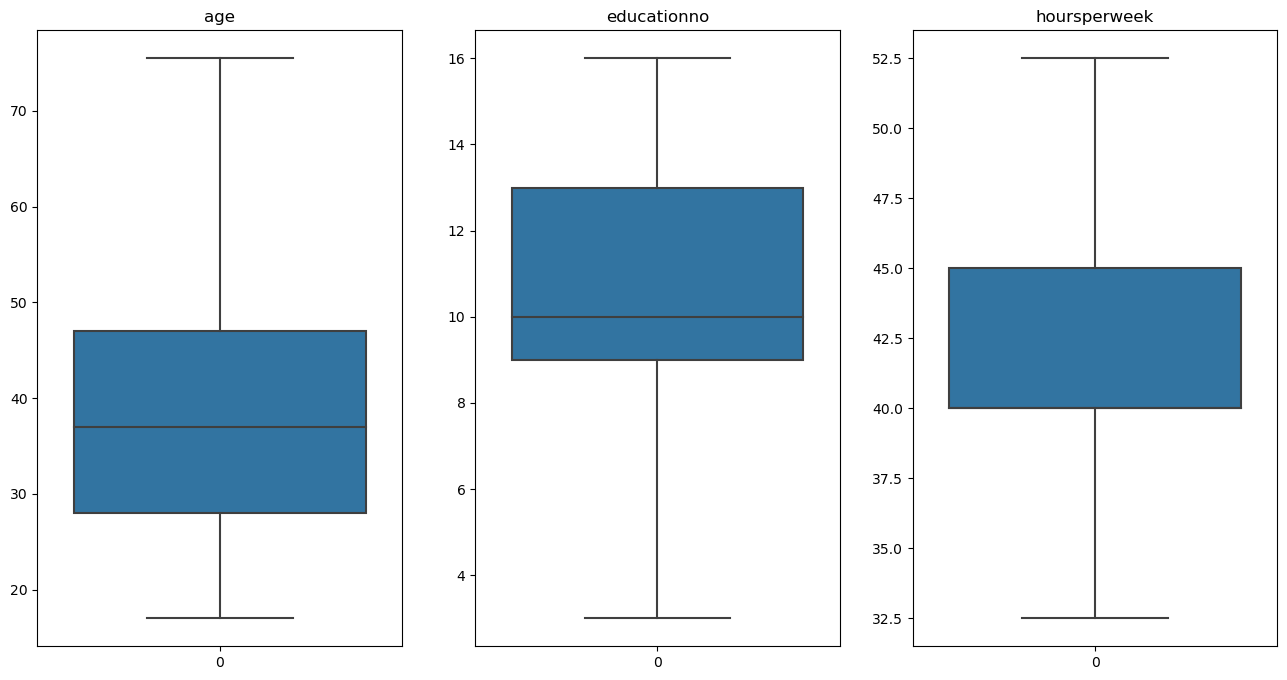

In [21]:
i=1
plt.figure(figsize=(16,8))
for col in cols:
    plt.subplot(1,3,i)
    sns.boxplot(sal1[col])
    plt.title(col)
    i=i+1

## EDA

In [71]:
col=sal1.select_dtypes(include="object").columns
col

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

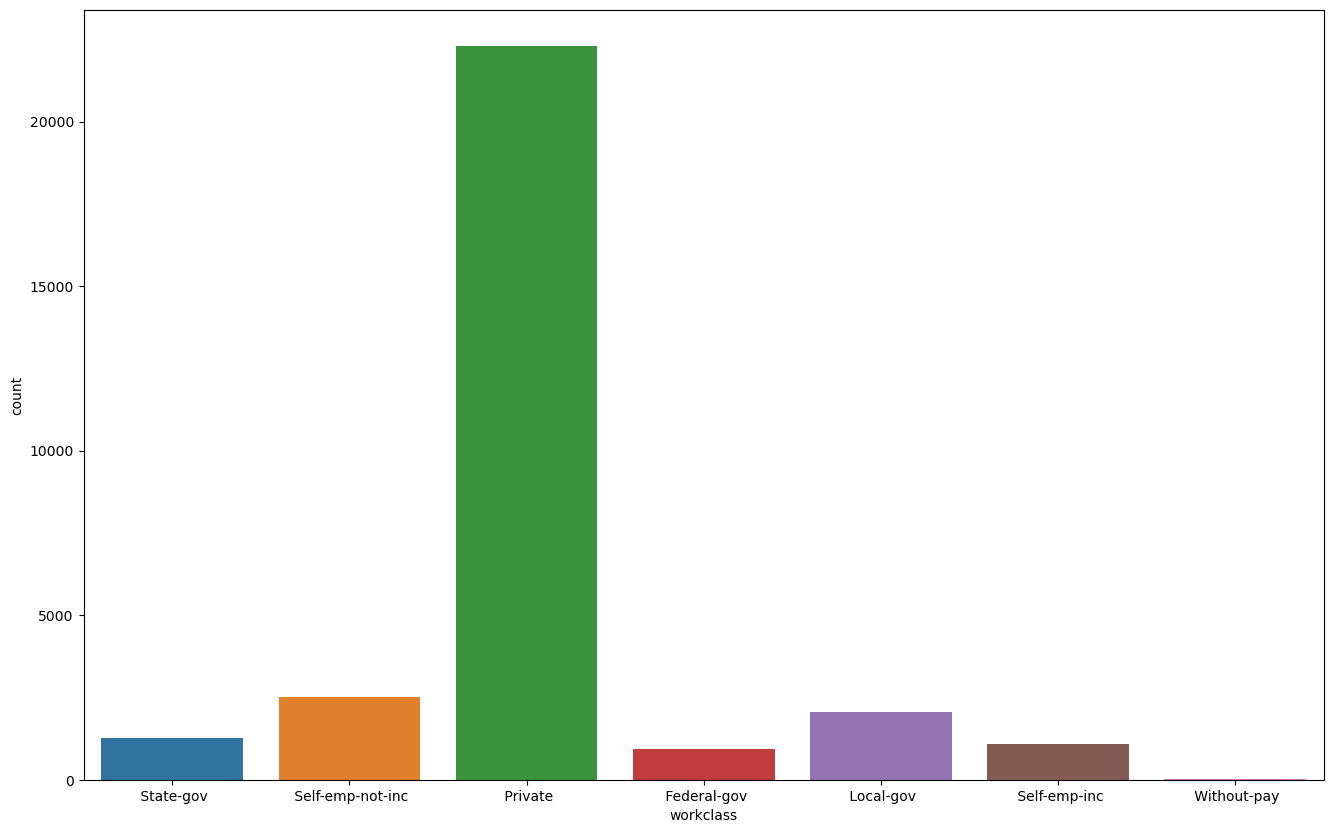

In [87]:
plt.figure(figsize=(16,10))
sns.countplot(x=sal1["workclass"])
plt.show()
#most of the people are working in private sector

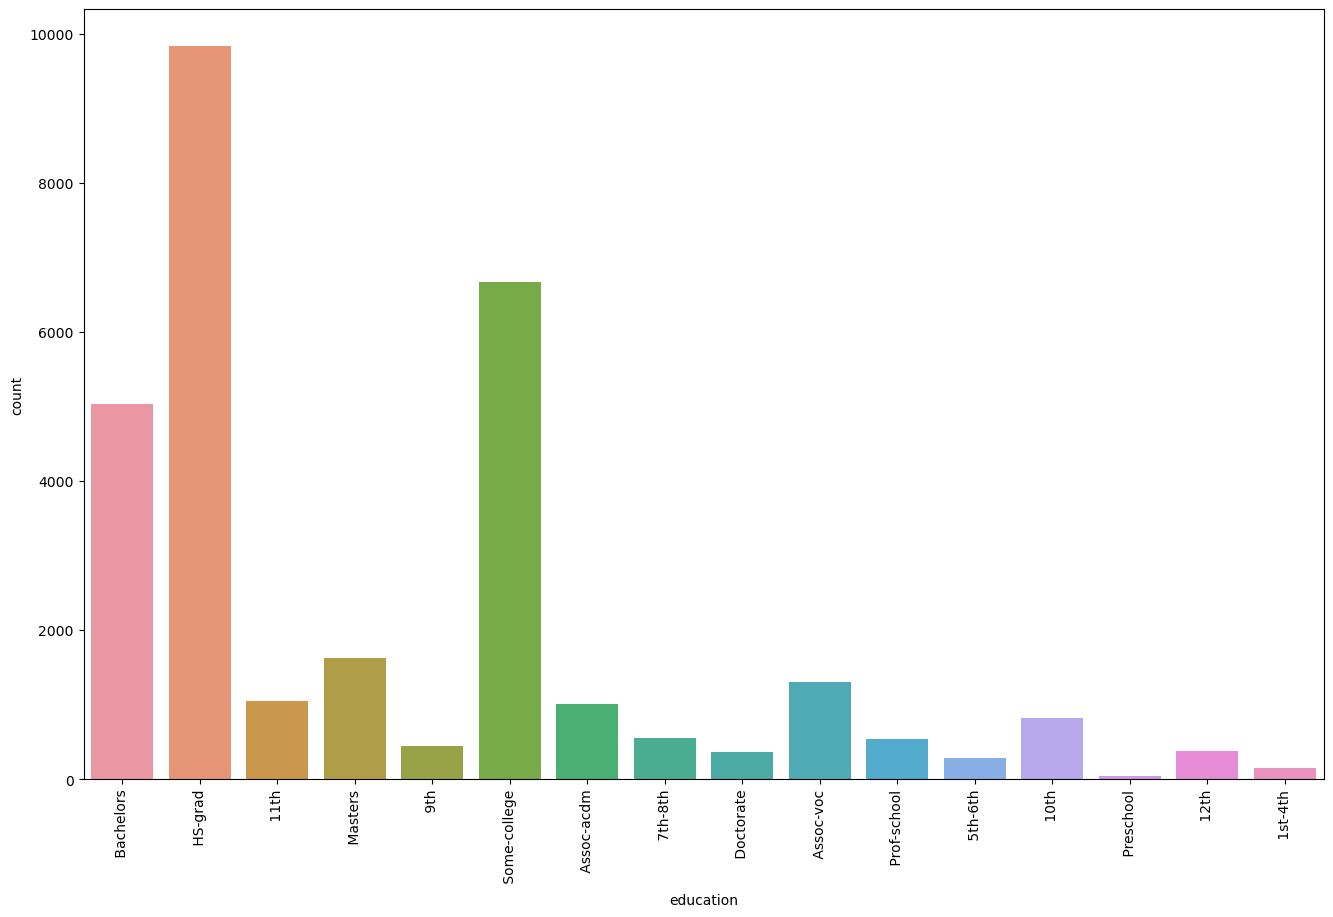

In [88]:
plt.figure(figsize=(16,10))
sns.countplot(x=sal1["education"])
plt.xticks(rotation=90)
plt.show()
#Maximum no. of people having qualification of HSC board

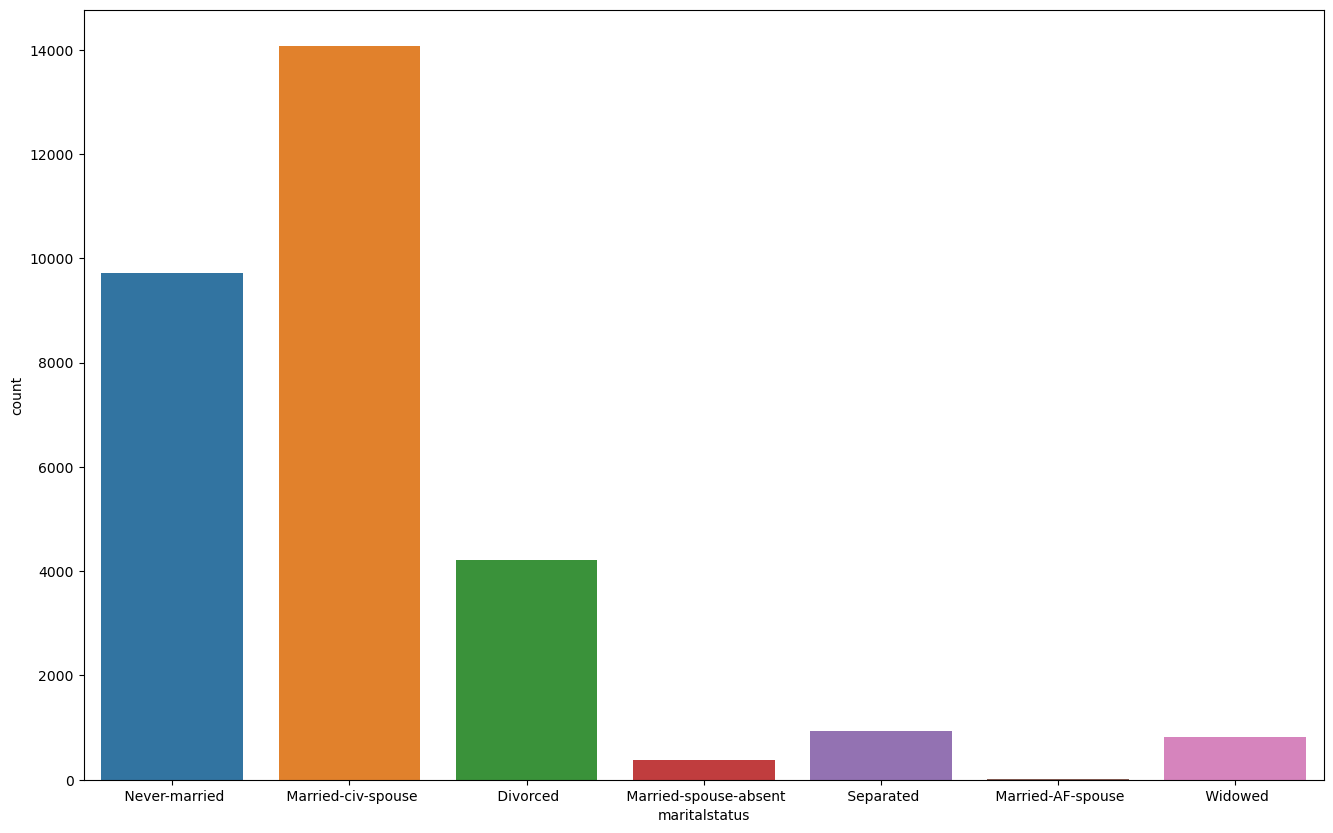

In [85]:
plt.figure(figsize=(16,10))
sns.countplot(x=sal1["maritalstatus"])
plt.show()
#There are married-civ-spouse highest in number

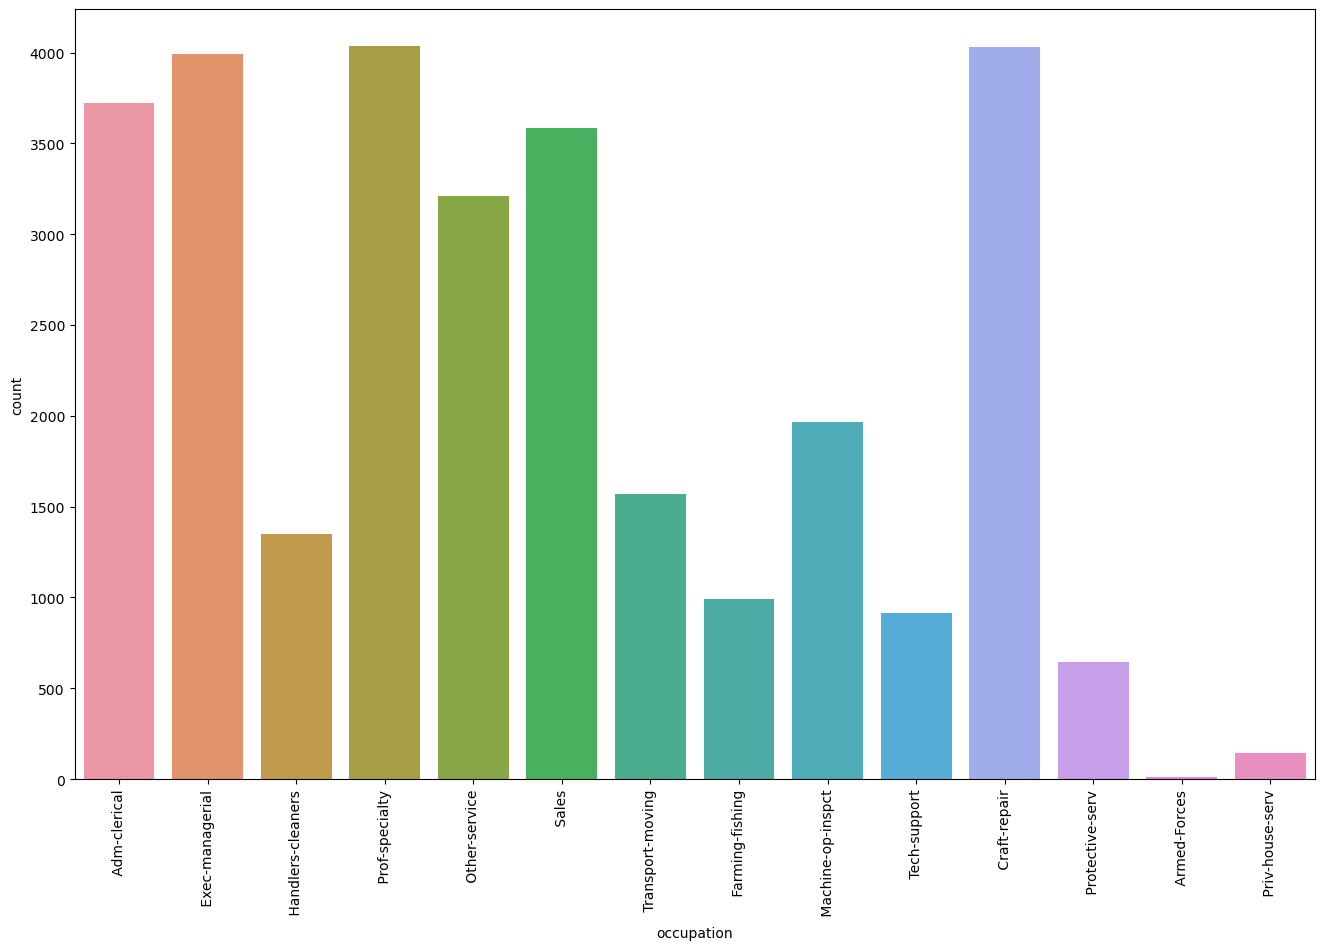

In [84]:
plt.figure(figsize=(16,10))
sns.countplot(x=sal1["occupation"])
plt.xticks(rotation=90)
plt.show()
#professor speciality and ex-manger are higher in number

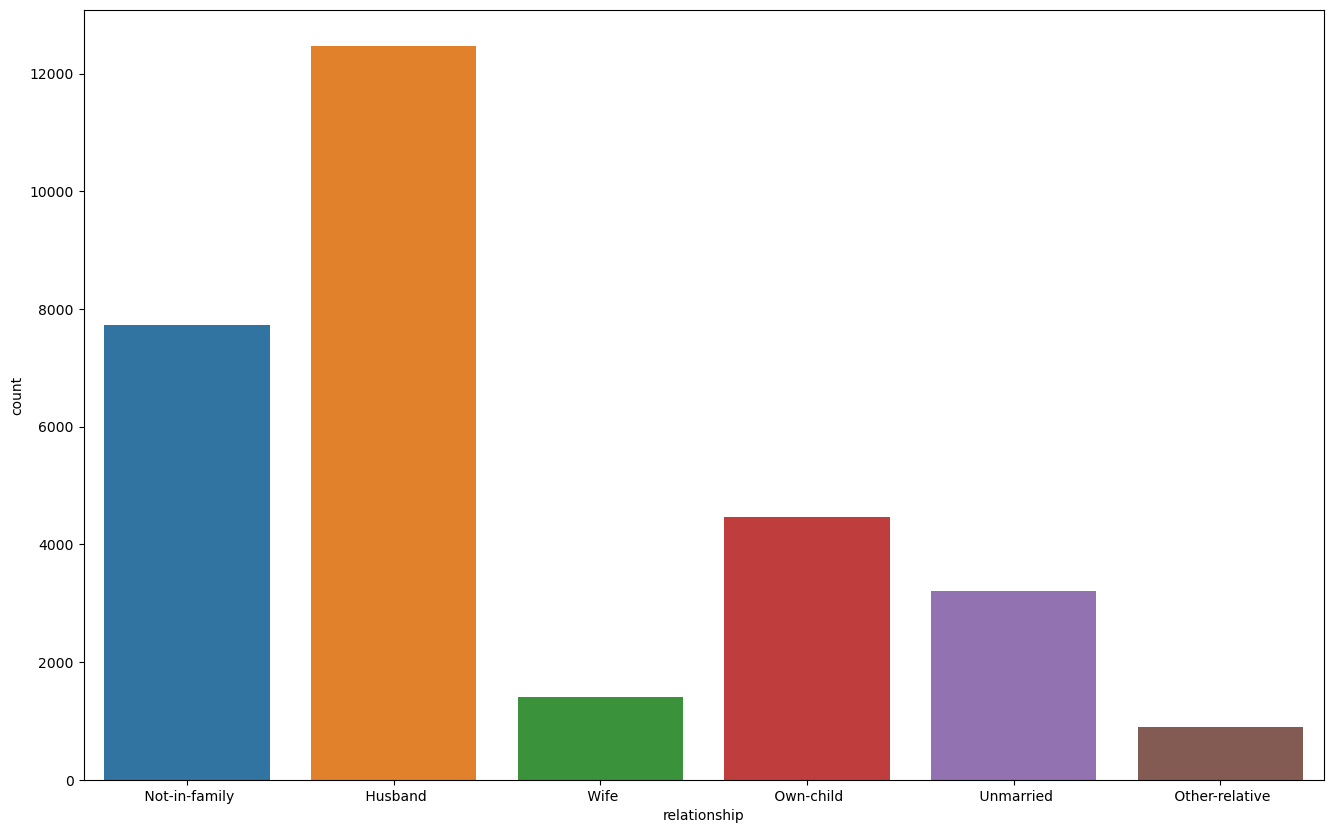

In [91]:
#relationship
plt.figure(figsize=(16,10))
sns.countplot(x=sal1["relationship"])
plt.show()
#Working husbands are more

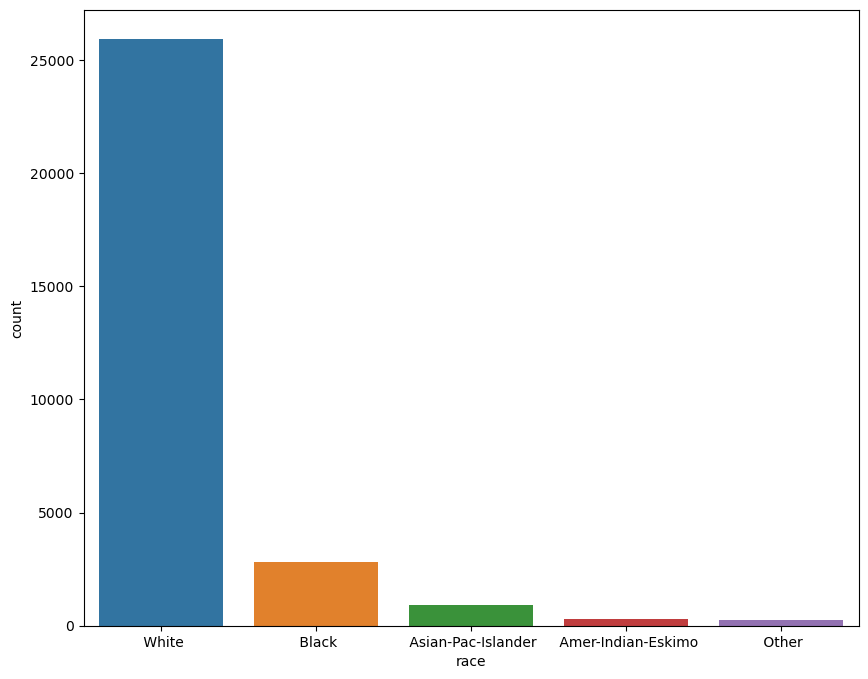

In [97]:
#race
plt.figure(figsize=(10,8))
sns.countplot(x=sal1["race"])
plt.show()
#White people are more in this coloney

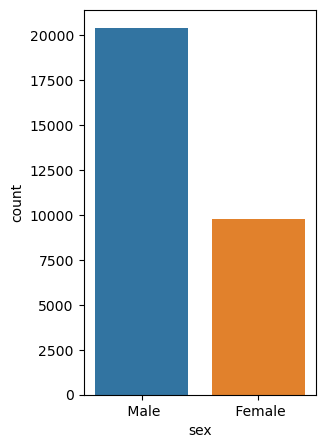

In [98]:
#sex
plt.figure(figsize=(3,5))
sns.countplot(x=sal1["sex"])
plt.show()
#more number of male are staying in the colony

In [114]:
top_10=sal1.native.value_counts().head(10)
df=pd.DataFrame(top_10)
df.index

Index([' United-States', ' Mexico', ' Philippines', ' Germany', ' Puerto-Rico',
       ' Canada', ' India', ' El-Salvador', ' Cuba', ' England'],
      dtype='object')

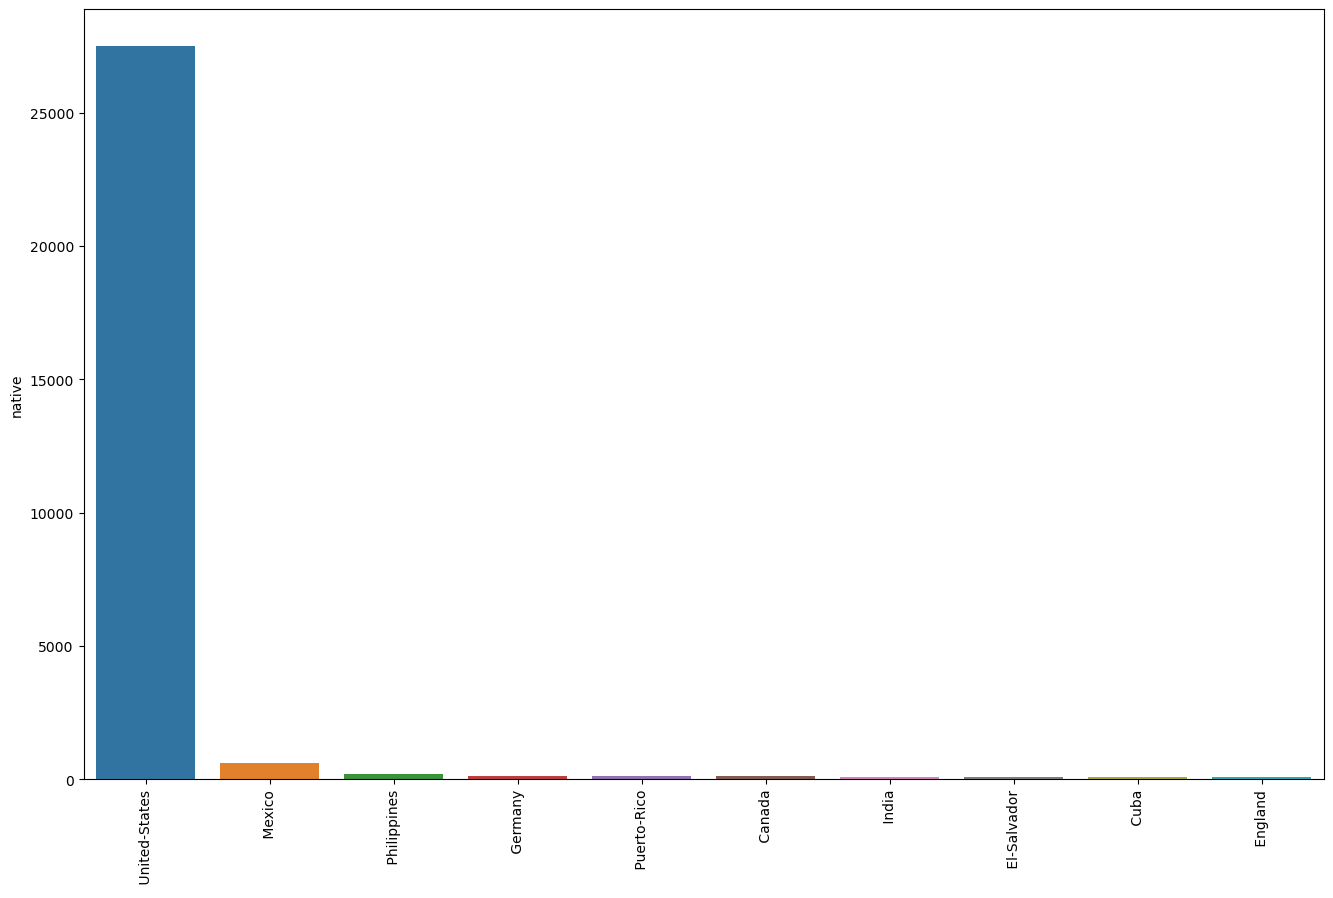

In [118]:
#native
plt.figure(figsize=(16,10))
sns.barplot(x=df.index,y=df["native"])
plt.xticks(rotation=90)
plt.show()
#majority are US native very few are from other country

In [123]:
sal=sal1.Salary.value_counts()
df_sal1=pd.DataFrame(sal)
df_sal1

,Salary
<=50K,22653
>50K,7508


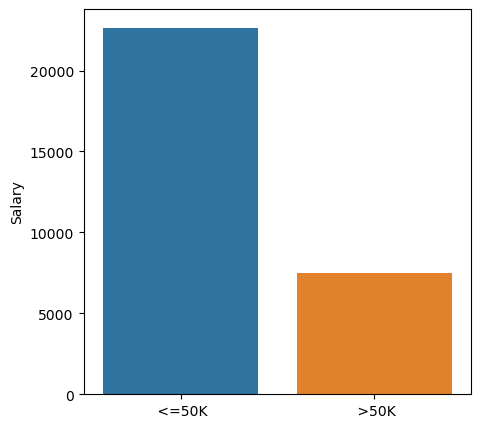

In [125]:
#Salary ,this is response variable
plt.figure(figsize=(5,5))
sns.barplot(x=df_sal1.index,y=df_sal1.Salary)
plt.show()
#people having salary less than 50k are more in this coloney

In [147]:
#educationno  is equivalent to education hence can be dropped
sal1=sal1.drop(["educationno"],axis=1)
sal2=sal2.drop(["educationno"],axis=1)

In [148]:
#capital-gain and capital-loss are irrelevant hence can be dropped
sal1=sal1.drop(["capitalgain"],axis=1)
sal1=sal1.drop(["capitalloss"],axis=1)
sal2=sal2.drop(["capitalgain"],axis=1)
sal2=sal2.drop(["capitalloss"],axis=1)

### salary train data

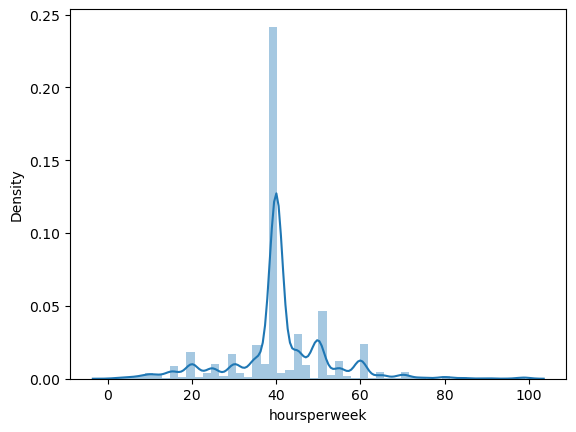

In [102]:
#hours-per-week
sns.distplot(sal1.hoursperweek)
plt.show()
#hoursperweek  is normal

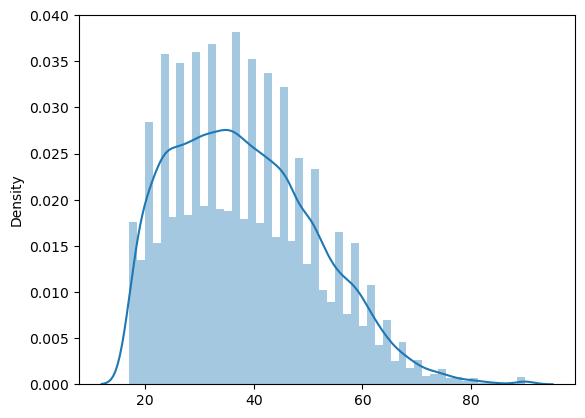

In [68]:
sns.distplot(x=sal1["age"])
plt.show()
# data is right skewwed

### salary test data

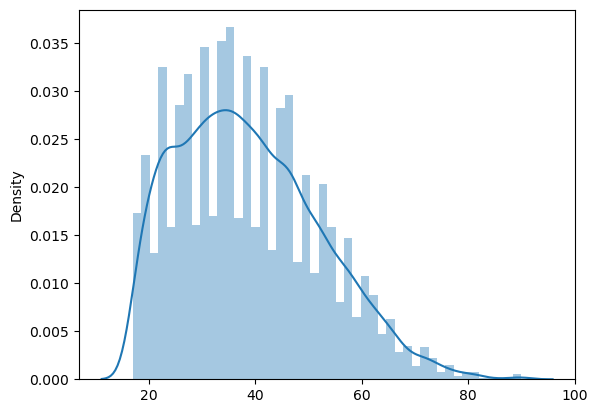

In [137]:
#age columns
sns.distplot(x=sal2["age"])
plt.show()
# data is right skewwed

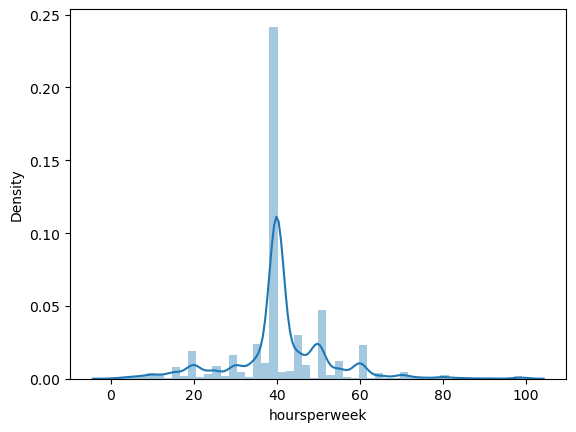

In [138]:
#hours-per-week
sns.distplot(sal2.hoursperweek)
plt.show()
#hoursperweek  is normal

In [149]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
sal1.workclass=labelencoder.fit_transform(sal1.workclass)
sal1.education=labelencoder.fit_transform(sal1.education)
sal1.maritalstatus=labelencoder.fit_transform(sal1.maritalstatus)
sal1.occupation=labelencoder.fit_transform(sal1.occupation)
sal1.relationship=labelencoder.fit_transform(sal1.relationship)
sal1.race=labelencoder.fit_transform(sal1.race)
sal1.sex=labelencoder.fit_transform(sal1.sex )
sal1.native=labelencoder.fit_transform(sal1.native)
sal1.Salary=labelencoder.fit_transform(sal1.Salary)

In [150]:
sal1.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,40,37,0
1,50,4,9,2,3,0,4,1,13,37,0
2,38,2,11,0,5,1,4,1,40,37,0
3,53,2,1,2,5,0,2,1,40,37,0
4,28,2,9,2,9,5,2,0,40,4,0


In [151]:
sal2.workclass=labelencoder.fit_transform(sal2.workclass)
sal2.education=labelencoder.fit_transform(sal2.education)
sal2.maritalstatus=labelencoder.fit_transform(sal2.maritalstatus)
sal2.occupation=labelencoder.fit_transform(sal2.occupation)
sal2.relationship=labelencoder.fit_transform(sal2.relationship)
sal2.race=labelencoder.fit_transform(sal2.race)
sal2.sex=labelencoder.fit_transform(sal2.sex )
sal2.native=labelencoder.fit_transform(sal2.native)
sal2.Salary=labelencoder.fit_transform(sal2.Salary)

In [152]:
sal2.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,25,2,1,4,6,3,2,1,40,37,0
1,38,2,11,2,4,0,4,1,50,37,0
2,28,1,7,2,10,0,4,1,40,37,1
3,44,2,15,2,6,0,2,1,40,37,1
4,34,2,0,4,7,1,4,1,30,37,0


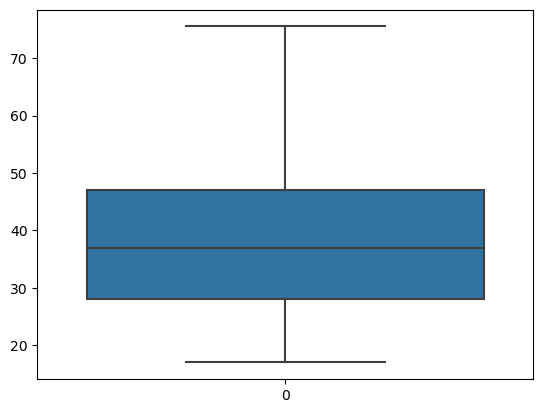

In [153]:
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['age'])
df=winsor.fit_transform(sal1[["age"]])
sns.boxplot(df.age)
plt.show()

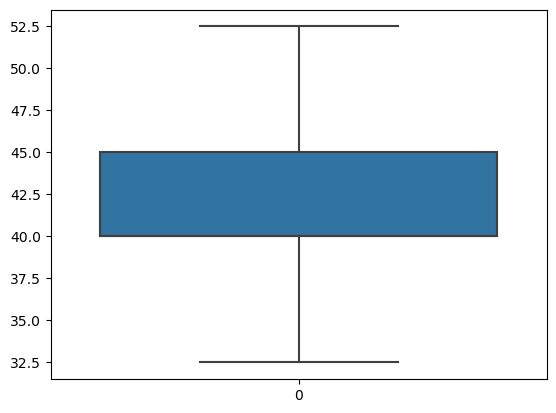

In [154]:
winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['hoursperweek'])
df=winsor.fit_transform(sal1[["hoursperweek"]])
sns.boxplot(df.hoursperweek)
plt.show()

<Axes: >

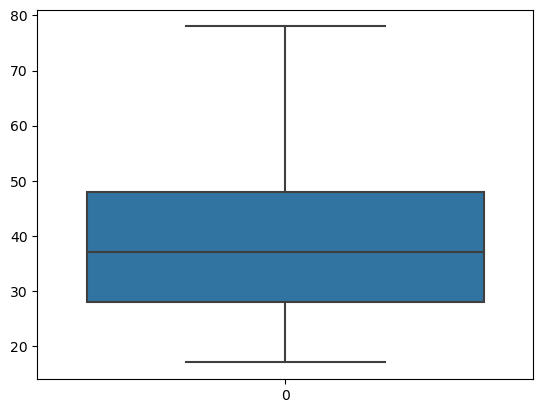

In [155]:
winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['age'])
df=winsor.fit_transform(sal2[["age"]])
sns.boxplot(df.age)


<Axes: >

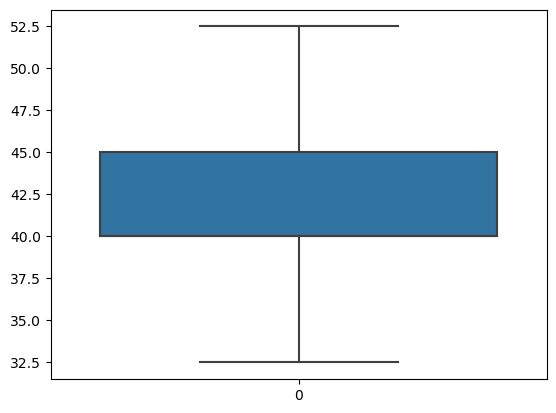

In [142]:
winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['hoursperweek'])
df=winsor.fit_transform(sal2[["hoursperweek"]])
sns.boxplot(df.hoursperweek)

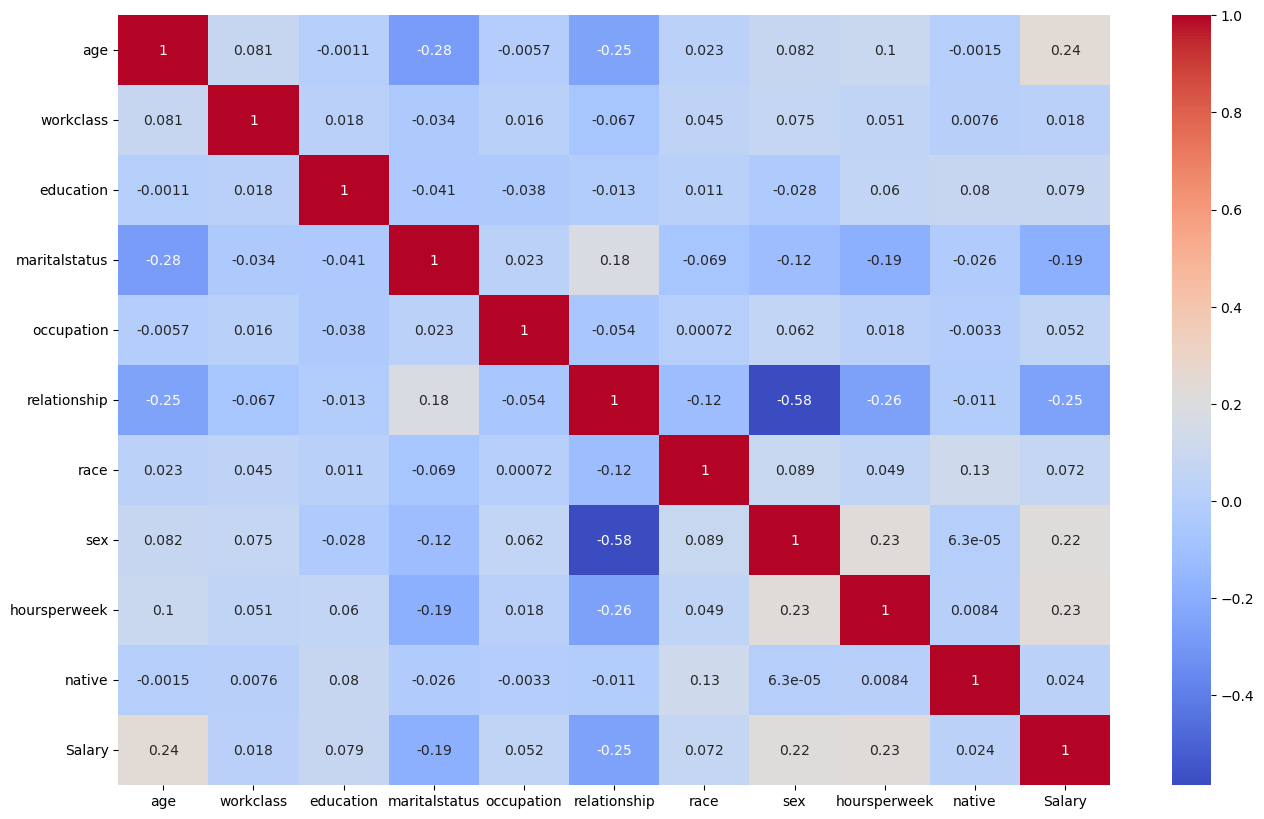

In [157]:
plt.figure(figsize=(16,10))
sns.heatmap(sal1.corr(),cmap="coolwarm",annot=True)
plt.show()

In [158]:
from sklearn.svm import SVC
train_X=sal1.iloc[:,:10]
train_y=sal1.iloc[:,10]
test_X=sal2.iloc[:,:10]
test_y=sal2.iloc[:,10]

In [160]:
#Kernel linear
model_linear=SVC(kernel="linear")
model_linear.fit(train_X,train_y)
pred_test_=model_linear.predict(test_X)

KeyboardInterrupt: 

In [ ]:
np.mean(pred_test_linear==test_y)